In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/shaneypeterson/Downloads/base_&_tuned_data.csv')

In [3]:
df.head()

,ticker,volatility,rmse_base,avg_price,len,rmse_tuned
0,BSNLF,High,0.044261,0.026089,1889,0.031845
1,FTA,Medium-Low,8.488856,38.647291,4457,4.376875
2,JTKWY,Medium-High,0.640134,9.432196,1226,0.565840
3,FWONB,Medium-Low,6.866346,46.538264,2016,6.854367
4,VRMMQ,High,116.538527,1104.577206,1173,78.179737


In [4]:
len(df)

150

In [5]:
df = df[['ticker', 'volatility', 'avg_price', 'len', 'rmse_base', 'rmse_tuned']]

In [6]:
df.head()

,ticker,volatility,avg_price,len,rmse_base,rmse_tuned
0,BSNLF,High,0.026089,1889,0.044261,0.031845
1,FTA,Medium-Low,38.647291,4457,8.488856,4.376875
2,JTKWY,Medium-High,9.432196,1226,0.640134,0.565840
3,FWONB,Medium-Low,46.538264,2016,6.866346,6.854367
4,VRMMQ,High,1104.577206,1173,116.538527,78.179737


In [7]:
df['pct_change'] = (df['rmse_tuned'] - df['rmse_base']) / df['rmse_base']

In [8]:
df.head()

,ticker,volatility,avg_price,len,rmse_base,rmse_tuned,pct_change
0,BSNLF,High,0.026089,1889,0.044261,0.031845,-0.280514
1,FTA,Medium-Low,38.647291,4457,8.488856,4.376875,-0.484397
2,JTKWY,Medium-High,9.432196,1226,0.640134,0.565840,-0.116060
3,FWONB,Medium-Low,46.538264,2016,6.866346,6.854367,-0.001745
4,VRMMQ,High,1104.577206,1173,116.538527,78.179737,-0.329151


In [ ]:
# Get the average pct_change for each volatility category

df.groupby('volatility').agg({'pct_change': 'mean'}).sort_values('pct_change', ascending=False).reset_index()

,volatility,pct_change
0,Low,-0.270306
1,Medium,-0.280984
2,High,-0.289844
3,Medium-Low,-0.301053
4,Medium-High,-0.317196


Not conclusively better by category. The model seems to perform 27-32% better than the baseline the same across volatility categories

In [12]:
# Which category had a wider range of pct_change values?

df.groupby('volatility').agg({'pct_change': 'std'}).sort_values('pct_change', ascending=False).reset_index()

,volatility,pct_change
0,Medium,0.285393
1,Medium-High,0.284781
2,High,0.253618
3,Medium-Low,0.246572
4,Low,0.239037


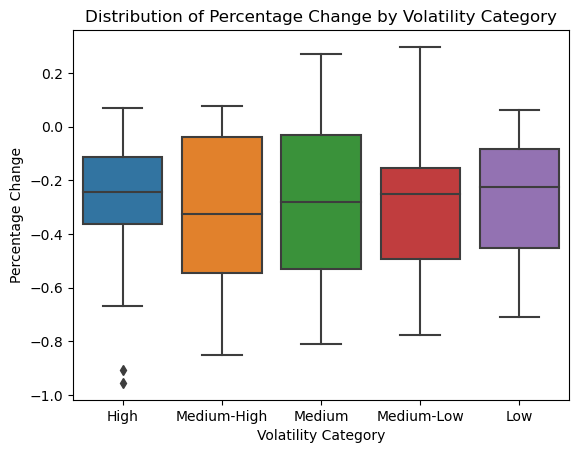

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired order of volatility categories
volatility_order = ['High', 'Medium-High', 'Medium', 'Medium-Low', 'Low']

# Create the boxplot, specifying the order
sns.boxplot(x='volatility', y='pct_change', data=df, order=volatility_order)
plt.title('Distribution of Percentage Change by Volatility Category')
plt.xlabel('Volatility Category')
plt.ylabel('Percentage Change')
plt.show()

In [22]:
# pct change between models across all samples was...

df['pct_change'].mean()

-0.2920212327272514

In [23]:
df['pct_change'].describe()

count    149.000000
mean      -0.292021
std        0.259694
min       -0.955344
25%       -0.489078
50%       -0.260396
75%       -0.085044
max        0.296587
Name: pct_change, dtype: float64

In [26]:
df.sort_values(by='pct_change').head()

,ticker,volatility,avg_price,len,rmse_base,rmse_tuned,pct_change
55,USCTF,High,81.086304,782,31.829700,1.421382,-0.955344
12,TNSTF,High,-17.926776,1977,29.400329,2.695678,-0.908311
148,XBIT,Medium-High,8.836452,2471,12.698112,1.871125,-0.852645
143,EB,Medium-High,13.356536,1605,7.036128,1.270628,-0.819414
47,HLRD,Medium,472.947625,3110,203.008332,38.210290,-0.811780
